In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Import

data = "C:\\Users\\aleks\\Desktop\\Vrengja1.json"
with open(data, 'r') as f:
    track_data = json.load(f)
    
filename = list(track_data)[0]
noteDurs = track_data[filename]["ratios"]["note_duration_ratios"]
scaleFactor = 10

r = [16, 22]

In [11]:
def scaleToNearestN(value, sf):
    if sf > 0:
        rest = value%sf
        if rest <= (sf/2):
            if (value-rest == 0):
                return 1
            else:
                return value-rest
        else:
            return (value+sf)-rest
    else:
        return value

In [12]:
# Reformat data

ORG_flatten_noteDurs = []
MOD_flatten_noteDurs = []
noteLabels = []

count = 0
for i, sub in enumerate(list(noteDurs.values())):
    if type(sub) is not list:
        count += 1
        ORG_flatten_noteDurs.append(sub)
        MOD_flatten_noteDurs.append(scaleToNearestN(sub, scaleFactor))
        noteLabels.append("note"+str(count)) 
    else:
        for j in list(sub):
            count += 1
            ORG_flatten_noteDurs.append(j)
            MOD_flatten_noteDurs.append(scaleToNearestN(j, scaleFactor))
            noteLabels.append("note"+str(count))

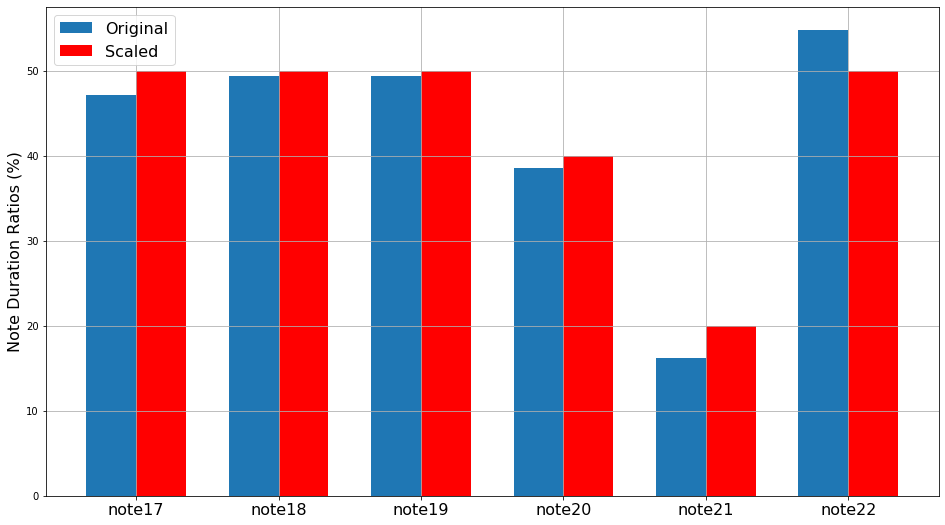

In [15]:
fig, ax = plt.subplots()
width = 0.35  # the width of the bars

# the label locations
x = np.arange(len(noteLabels[r[0]:r[1]]))

ax.bar(x - (width/2), ORG_flatten_noteDurs[r[0]:r[1]], width, label='Original')
ax.bar(x + (width/2), MOD_flatten_noteDurs[r[0]:r[1]], width, label='Scaled', color="red")

# text
#for i, v in enumerate(ORG_flatten_noteDurs[r[0]:r[1]]):
#    ax.text(i, v + 3, "hello")

fig.set_figheight(9)
fig.set_figwidth(16)

ax.set_ylabel('Note Duration Ratios (%)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(noteLabels[r[0]:r[1]], fontsize=16)
#ax.set_title('Note durations')

ax.grid()
ax.legend(fontsize=16)

In [17]:
fig.savefig('scaling-features-plot-factor10.jpg')